In [1]:
import os
import tarfile
import pandas as pd
cwd = os.getcwd()
print(cwd)

C:\Users\USER\Stanley Cup Winner Predictor


In [2]:
NHL_SEASON_DATA_PATH = 'nhl_season_data'

def load_nhl_data(nhl_season_data_path=NHL_SEASON_DATA_PATH):
    csv_path = os.path.join(nhl_season_data_path, 'teamHistoricalStats.csv')
    return pd.read_csv(csv_path, encoding = "ISO-8859-1")

def load_current_nhl_data(nhl_season_data_path=NHL_SEASON_DATA_PATH):
    csv_path = os.path.join(nhl_season_data_path, 'teamCurrentStats.csv')
    return pd.read_csv(csv_path, encoding = "ISO-8859-1")

In [3]:
nhl_season_data = load_nhl_data()
X = load_current_nhl_data()

In [4]:
nhl_season_data.head()

,P%,GF/GP,GA/GP,Net PP%,Net PK%,Shots/GP,SA/GP,WinStanleyCup
0,0.799,3.96,2.21,19.3,92.8,32.3,24.2,0
1,0.806,4.49,2.29,31.4,85.3,32.8,25.9,1
2,0.780,3.89,2.70,27.1,89.5,32.0,32.1,0
3,0.756,3.67,2.51,20.0,87.0,34.1,26.6,0
4,0.738,3.82,2.77,22.7,80.1,32.8,30.9,0


In [5]:
nhl_season_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   P%             1110 non-null   float64
 1   GF/GP          1110 non-null   float64
 2   GA/GP          1110 non-null   float64
 3   Net PP%        1110 non-null   float64
 4   Net PK%        1110 non-null   float64
 5   Shots/GP       1110 non-null   float64
 6   SA/GP          1110 non-null   float64
 7   WinStanleyCup  1110 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 69.5 KB


In [ ]:
nhl_season_data['Team'].value_counts()

In [6]:
nhl_season_data.describe()

,P%,GF/GP,GA/GP,Net PP%,Net PK%,Shots/GP,SA/GP,WinStanleyCup
count,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000
mean,0.531388,3.075973,3.059757,16.342703,83.759099,29.816937,29.772613,0.039640
std,0.099447,0.576596,0.586514,3.664057,3.711773,2.158424,2.571647,0.195199
min,0.238000,1.830000,1.890000,4.800000,70.200000,23.700000,22.100000,0.000000
25%,0.463000,2.650000,2.620000,13.800000,81.525000,28.400000,28.200000,0.000000
50%,0.538000,2.950000,2.950000,16.100000,84.100000,29.900000,29.800000,0.000000
75%,0.604000,3.437500,3.400000,18.800000,86.300000,31.300000,31.575000,0.000000
max,0.806000,5.580000,5.190000,31.400000,95.400000,36.800000,37.000000,1.000000


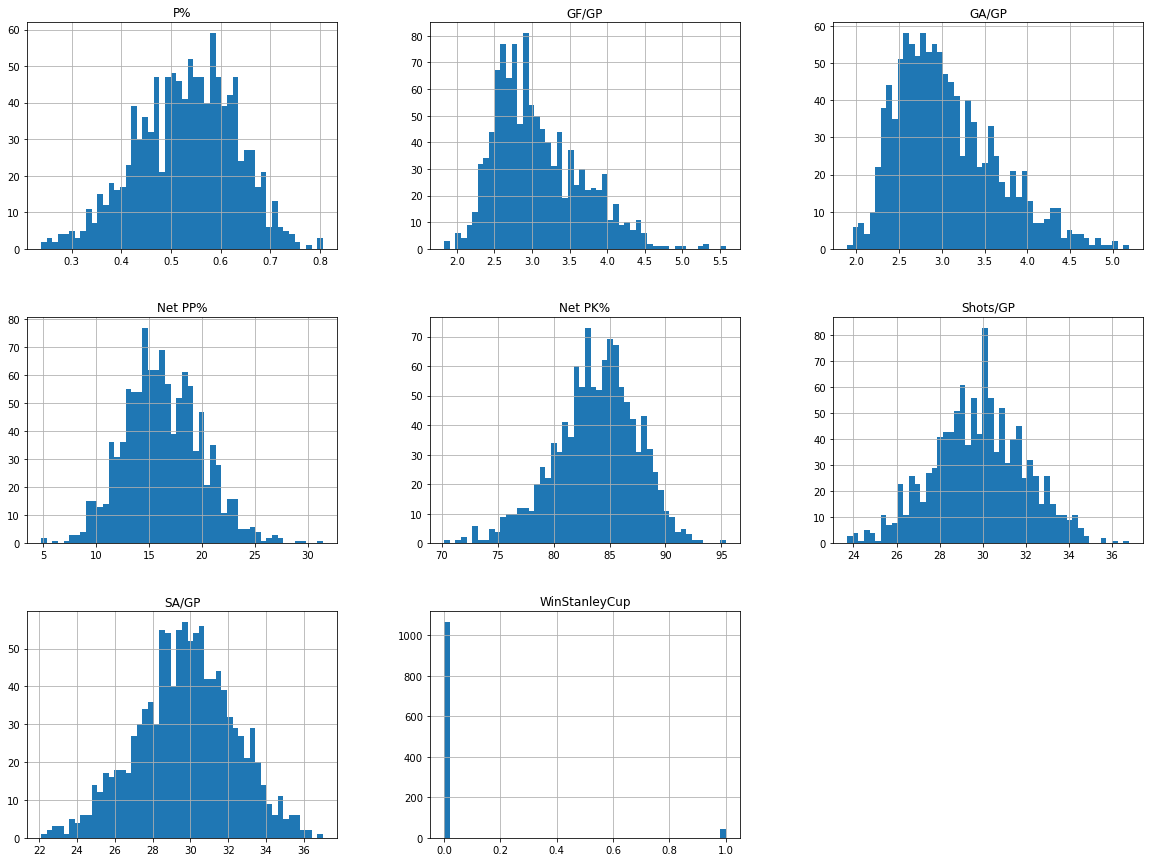

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
nhl_season_data.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
corr_matrix = nhl_season_data.corr()

In [9]:
corr_matrix

,P%,GF/GP,GA/GP,Net PP%,Net PK%,Shots/GP,SA/GP,WinStanleyCup
P%,1.000000,0.308792,-0.616562,0.420212,0.487351,0.410556,-0.424772,0.239500
GF/GP,0.308792,1.000000,0.489691,0.638752,-0.142657,0.462692,0.064350,0.172307
GA/GP,-0.616562,0.489691,1.000000,0.129211,-0.650664,0.040357,0.538436,-0.094980
Net PP%,0.420212,0.638752,0.129211,1.000000,-0.099868,0.405981,-0.016585,0.135935
Net PK%,0.487351,-0.142657,-0.650664,-0.099868,1.000000,-0.010584,-0.417851,0.130925
Shots/GP,0.410556,0.462692,0.040357,0.405981,-0.010584,1.000000,-0.024836,0.141370
SA/GP,-0.424772,0.064350,0.538436,-0.016585,-0.417851,-0.024836,1.000000,-0.110104
WinStanleyCup,0.239500,0.172307,-0.094980,0.135935,0.130925,0.141370,-0.110104,1.000000


In [10]:
nhl_season_data_labels = nhl_season_data['WinStanleyCup'].copy()
nhl_season_data = nhl_season_data.drop('WinStanleyCup', axis=1)

In [11]:
nhl_season_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   P%        1110 non-null   float64
 1   GF/GP     1110 non-null   float64
 2   GA/GP     1110 non-null   float64
 3   Net PP%   1110 non-null   float64
 4   Net PK%   1110 non-null   float64
 5   Shots/GP  1110 non-null   float64
 6   SA/GP     1110 non-null   float64
dtypes: float64(7)
memory usage: 60.8 KB


In [ ]:

nhl_season_data = nhl_season_data.drop('TeamID', axis=1)
nhl_season_data = nhl_season_data.drop('Team', axis=1)
nhl_season_data = nhl_season_data.drop('SeasonCropped', axis=1)

In [12]:
nhl_season_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   P%        1110 non-null   float64
 1   GF/GP     1110 non-null   float64
 2   GA/GP     1110 non-null   float64
 3   Net PP%   1110 non-null   float64
 4   Net PK%   1110 non-null   float64
 5   Shots/GP  1110 non-null   float64
 6   SA/GP     1110 non-null   float64
dtypes: float64(7)
memory usage: 60.8 KB


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_nhl_season_data = scaler.fit_transform(nhl_season_data)
#now the data is a numpy array and has no column headers

In [14]:
print(scaled_nhl_season_data)

[[0.98767606 0.568      0.0969697  ... 0.8968254  0.65648855 0.1409396 ]
 [1.         0.70933333 0.12121212 ... 0.59920635 0.69465649 0.25503356]
 [0.95422535 0.54933333 0.24545455 ... 0.76587302 0.63358779 0.67114094]
 ...
 [0.28873239 0.20266667 0.45151515 ... 0.11111111 0.38931298 0.59731544]
 [0.25704225 0.10133333 0.38484848 ... 0.43253968 0.23664122 0.5704698 ]
 [0.16197183 0.14933333 0.48787879 ... 0.44047619 0.35877863 0.77852349]]


In [15]:
from sklearn.svm import SVC
clf = SVC(C=1, gamma=0.001, kernel='rbf', probability=True)
clf.fit(nhl_season_data, nhl_season_data_labels)

SVC(C=1, gamma=0.001, probability=True)

In [16]:
import numpy as np
clf.predict(X)
probs = clf.predict_proba(X)
print(probs)

[[0.96718814 0.03281186]
 [0.95973887 0.04026113]
 [0.97086189 0.02913811]
 [0.93645408 0.06354592]
 [0.94864248 0.05135752]
 [0.97649223 0.02350777]
 [0.94591216 0.05408784]
 [0.9631412  0.0368588 ]
 [0.9633059  0.0366941 ]
 [0.95171992 0.04828008]
 [0.9696893  0.0303107 ]
 [0.9372454  0.0627546 ]
 [0.9594751  0.0405249 ]
 [0.96509984 0.03490016]
 [0.96988915 0.03011085]
 [0.94708521 0.05291479]
 [0.9556147  0.0443853 ]
 [0.98040457 0.01959543]
 [0.9637966  0.0362034 ]
 [0.94272664 0.05727336]
 [0.948491   0.051509  ]
 [0.96392295 0.03607705]
 [0.94531537 0.05468463]
 [0.96073242 0.03926758]
 [0.95632735 0.04367265]
 [0.94357505 0.05642495]
 [0.93647441 0.06352559]
 [0.93775563 0.06224437]
 [0.97876334 0.02123666]
 [0.97260831 0.02739169]
 [0.99185527 0.00814473]
 [0.98518005 0.01481995]]


In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import precision_score, recall_score

skfolds = StratifiedKFold(n_splits=5)

for train_index, test_index in skfolds.split(nhl_season_data, nhl_season_data_labels):
    clone_clf = clone(clf)
    X_train_folds = nhl_season_data[train_index]
    y_train_folds = (nhl_season_data_labels[train_index])
    X_test_fold = nhl_season_data[test_index]
    y_test_fold = (nhl_season_data_labels[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
    print(recall_score(y_test_fold, y_pred))

KeyError: "None of [Int64Index([  27,   38,   40,   41,   47,   58,   60,   70,   82,   99,\n            ...\n            1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109],\n           dtype='int64', length=888)] are in the [columns]"

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, nhl_season_data, nhl_season_data_labels, cv=10, scoring="accuracy")

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(clf, nhl_season_data, nhl_season_data_labels, cv=10)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(nhl_season_data_labels, y_train_pred)

In [18]:
from sklearn.model_selection import GridSearchCV
parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-2],
                     'C': [1, 1000, 10000, 100000]},
                    {'kernel': ['linear'], 'C': [1, 1000, 10000, 100000]}]

SVC = GridSearchCV(estimator=SVC(), param_grid=parameters)

In [19]:
SVC.fit(scaled_nhl_season_data, nhl_season_data_labels)
print(SVC.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [20]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(scaled_nhl_season_data, nhl_season_data_labels)

LogisticRegression()

In [21]:
log_reg.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [22]:
log_reg.predict_proba(X)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])